## Observations and Insights 

In [129]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Display the data table for preview
combined_data_df = pd.merge(mouse_metadata_df, study_results_df, how='outer', on= 'Mouse ID')
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [130]:
# Checking the number of mice.
mice_count = combined_data_df['Mouse ID'].unique()
print(len(mice_count))

249


In [131]:
cleaned_df = combined_data_df.drop_duplicates(['Mouse ID','Timepoint'], keep= False)
cleaned_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [133]:
new_mice_count = cleaned_df['Mouse ID'].unique()
print(len(new_mice_count))

249


In [135]:
print(combined_data_df[combined_data_df.duplicated(['Mouse ID','Timepoint'], keep=False)]['Mouse ID'])

908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object


AttributeError: 'DataFrame' object has no attribute 'unique'

In [36]:
# Optional: Get all the data for the duplicate mouse ID. 


<bound method SeriesGroupBy.value_counts of <pandas.core.groupby.generic.SeriesGroupBy object at 0x7ff5ef03e7b8>>

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [98]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

grouped_df = combined_data_df[['Drug Regimen', 'Tumor Volume (mm3)']]
grouped_df


# Using GroupBy in order to separate the data into fields according to "state" values
#grouped_drug_df = combined_data_df.groupby(['Drug Regimen'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
#print(grouped_drug_df)

# In order to be visualized, a data function must be used...
#grouped_drug_df.count().head(10)


,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,45.000000
1,Ramicane,38.825898
2,Ramicane,35.014271
3,Ramicane,34.223992
4,Ramicane,32.997729
...,...,...
1888,Naftisol,63.145652
1889,Naftisol,65.841013
1890,Naftisol,69.176246
1891,Naftisol,70.314904


In [107]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_mean = grouped_df.groupby(['Drug Regimen']).mean()
print(tumor_mean)
tumor_med = grouped_df.groupby(['Drug Regimen']).median()
print(tumor_med)
tumor_var = grouped_df.groupby(['Drug Regimen']).var()
print(tumor_var)
tumor_std = grouped_df.groupby(['Drug Regimen']).std()
print(tumor_std)
tumor_sem = grouped_df.groupby(['Drug Regimen']).sem()
print(tumor_sem)

# Using the aggregation method, produce the same summary statistics in a single line
#summary_statistics = grouped_df.groupby(['Drug Regimen']).agg("tumor_mean", "tumor_med", "tumor_var", "tumor_std", "tumor_sem"])
#summary_statistics

              Tumor Volume (mm3)
Drug Regimen                    
Capomulin              40.675741
Ceftamin               52.591172
Infubinol              52.884795
Ketapril               55.235638
Naftisol               54.331565
Placebo                54.033581
Propriva               52.322552
Ramicane               40.216745
Stelasyn               54.233149
Zoniferol              53.236507
              Tumor Volume (mm3)
Drug Regimen                    
Capomulin              41.557809
Ceftamin               51.776157
Infubinol              51.820584
Ketapril               53.698743
Naftisol               52.509285
Placebo                52.288934
Propriva               50.854632
Ramicane               40.673236
Stelasyn               52.431737
Zoniferol              51.818479
              Tumor Volume (mm3)
Drug Regimen                    
Capomulin              24.947764
Ceftamin               39.290177
Infubinol              43.128684
Ketapril               68.553577
Naftisol  

## Bar and Pie Charts

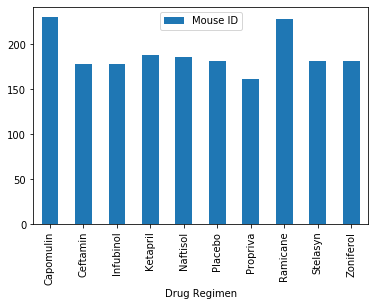

In [151]:
drug_regimen = combined_data_df.groupby('Drug Regimen')
mice_drug = drug_regimen['Mouse ID'].count()
mice_drug_df = mice_drug.to_frame()
drug_chart = mice_drug_df.plot(kind="bar")

TypeError: unhashable type: 'numpy.ndarray'

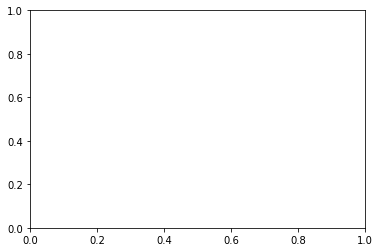

In [154]:
drugs = [13000, 26000, 52000, 30000, ]
x_axis = np.arange(len(new_mice_count))

plt.bar(x_axis, y_axis)

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [155]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

cleaned_df



# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
times = []
fig1, ax1 = plt.subplots()
ax1.set_title('Reaction Times at Baseball Batting Cage')
ax1.set_ylabel('Reaction Time (ms)')
ax1.boxplot(times)
plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
